### **Перевірка даних на нормальність за допомогою критерію Шапіра-Уілка**

 

1.   Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.






In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

In [2]:
distributions = pd.DataFrame({
    'normal'     : np.sort(np.random.normal(loc = 7, scale = 5, size = 20)),
    'normal1'    : np.sort(np.random.normal(loc = 0, scale = 1, size = 20)),
    'normal2'    : np.sort(np.random.normal(loc = 3, scale = 4, size = 20)),
    'lognormal'  : np.sort(np.random.lognormal(mean = 5, sigma = 3, size = 20)),
    'geometric'  : np.sort(np.random.geometric(0.3, 20)),
    'exponential': np.sort(np.random.exponential(2, 20))
})

distributions

,normal,normal1,normal2,lognormal,geometric,exponential
0,-2.235491,-1.524073,-4.869633,0.991837,1,0.015239
1,-0.210251,-1.161036,-0.665086,2.372244,1,0.029703
2,2.959371,-0.898590,0.529631,2.518911,1,0.050298
3,4.057874,-0.857299,0.565259,4.178788,1,0.284471
4,4.141628,-0.780504,1.252871,5.902174,1,0.433260
5,4.179964,-0.530021,1.538916,6.733112,1,0.637154
6,4.328131,-0.520901,3.027332,9.389512,1,0.657726
7,4.354993,-0.422866,3.353898,14.842423,2,0.775565
8,4.854521,-0.277128,3.449623,42.909926,2,0.850465
9,5.798151,-0.160895,4.782479,49.593742,2,1.661812


2.   Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних.
Детальний опис роботи критерію та приклад його розрахунку (с. 606):
https://pdfs.semanticscholar.org/e4a7/42a4f0585b4e4069726f6628f4d4285a0827.pdf



In [3]:
def get_coeficients(obs_num, coef_file, dist_points_file):
    test_coefs = pd.read_excel(coef_file)[obs_num]/10000
    w_tables =pd.read_excel(dist_points_file)
    
    # crutches for the god of crutches
    # due to table shift (1 - 3, 2 -4), i firstly get
    # the row with required n, then extract its value
    headers = list(w_tables.columns.values)
    required_row = w_tables.loc[w_tables[headers[0]] == 20]
    return test_coefs[:10], required_row[headers[-1]].iloc[0]/1000
    
def squared_mean(array):
    mean = np.mean(array)
    return sum([(num-mean)**2 for num in array])
    
def mirror_substruct(array, test_coefs):
    counter = 0
    for idx in range(len(array)//2):
        counter += test_coefs[idx]*(array.iloc[-idx-1] - array[idx])
    return counter


def shapiro_wilk(to_check):
    observations_num = len(to_check)
    middle = int(observations_num/2)
    test_coefs, w_table = get_coeficients(observations_num, 
                                        "Coeficients for the W test for normality.xlsx",
                                         "Рoints of the distribution of W.xlsx")
    
    sqrt_mean = squared_mean(to_check)
    b = mirror_substruct(to_check, test_coefs)
    result_coef = (b**2)/sqrt_mean
    
    return w_table, result_coef

def is_normal(to_check):
    w_table, result_coef = shapiro_wilk(to_check)
    print(result_coef)
    if ( result_coef > w_table):
        return True
    return False

3. Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution.
Шаблон таблиці:
https://drive.google.com/file/d/1gRNsk9UDhl_6GGkJ04q0cBWBgsJvTgI4/view?usp=sharing

In [4]:
to_fill = pd.DataFrame(columns = ["Variable", "Statistics", "Distribution"])
to_fill

,Variable,Statistics,Distribution


4. Занести в стовпчик Variable назви змінних.

In [5]:
to_fill["Variable"] = distributions.keys()
to_fill

,Variable,Statistics,Distribution
0,normal,NaN,NaN
1,normal1,NaN,NaN
2,normal2,NaN,NaN
3,lognormal,NaN,NaN
4,geometric,NaN,NaN
5,exponential,NaN,NaN


5. Занести в стовпчик Distribution результати роботи криетрію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".

In [6]:
to_fill["Distribution"] = ["normal" if is_normal(distributions[dist]) 
                               else "non-normal" for dist in distributions]
to_fill

0.9442683608693927
0.9595965828219659
0.9686680382519427
0.314870746797775
0.6371465036802031
0.880956169172158


,Variable,Statistics,Distribution
0,normal,NaN,normal
1,normal1,NaN,normal
2,normal2,NaN,normal
3,lognormal,NaN,non-normal
4,geometric,NaN,non-normal
5,exponential,NaN,non-normal


6. Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення. Записати в таблицю. Форма запису: Середнє [стандартне відхилення].



In [7]:
normal_fmt = "{:.3f} [{:.3f}]"
for _, value in to_fill.iterrows():
    name = value["Variable"]
    
    if value["Distribution"] != "normal":
        continue
        
    mean, std = distributions[name].mean(), distributions[name].std()
    value["Statistics"] = normal_fmt.format(mean, std)
            
to_fill

,Variable,Statistics,Distribution
0,normal,6.708 [4.202],normal
1,normal1,0.007 [0.887],normal
2,normal2,4.071 [3.668],normal
3,lognormal,NaN,non-normal
4,geometric,NaN,non-normal
5,exponential,NaN,non-normal


7. Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%].

In [8]:
not_normal_fmt = "{:.3f} [{:.3f}; {:.3f}]"
for _, value in to_fill.iterrows():
    name = value["Variable"]
    
    if value["Distribution"] != "non-normal":
        continue
        
    median, quant25, quant75 = (distributions[name].median(), 
                                    distributions[name].quantile(0.25), 
                                        distributions[name].quantile(0.75))
    value["Statistics"] = not_normal_fmt.format(median, quant25, quant75)
    
to_fill

,Variable,Statistics,Distribution
0,normal,6.708 [4.202],normal
1,normal1,0.007 [0.887],normal
2,normal2,4.071 [3.668],normal
3,lognormal,58.192 [6.525; 1709.234],non-normal
4,geometric,2.000 [1.000; 3.000],non-normal
5,exponential,1.933 [0.586; 2.961],non-normal


8. Зберегти таблицю в пдф форматі

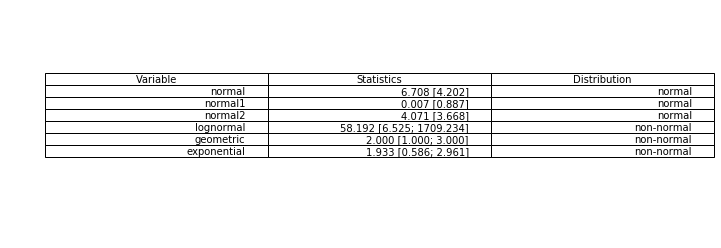

In [9]:
fig, ax =plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=to_fill.values,colLabels=to_fill.columns,loc='center')

pp = PdfPages("outpit.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()